In [19]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
import umap
import pymde
import torch

# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data

for n_range in [100,1000,10000]:

    N_predict = n_range
    # Make the encoder do its job. We can now store this as an output to a var
    training_predicted = encoder.predict(test_data[:N_predict])

    tsne_encoded = %timeit -r 100 -n 1 -o TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
    tsne_unencoded = %timeit -r 100 -n 1 -o TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(test_data[:N_predict])

    reducer = umap.UMAP()
    umap_encoded = %timeit -r 100 -n 1 -o reducer.fit_transform(training_predicted)
    umap_unencoded = %timeit -r 100 -n 1 -o reducer.fit_transform(test_data[:N_predict])

    mde_encoded = %timeit -r 100 -n 1 -o pymde.preserve_neighbors(torch.Tensor(training_predicted), verbose=False).embed(snapshot_every=2)
    mde_unencoded = %timeit -r 100 -n 1 -o pymde.preserve_neighbors(torch.Tensor(test_data[:N_predict].to_numpy()), verbose=False).embed(snapshot_every=2)

    dic = {'type':['tsne']*(len(tsne_encoded.all_runs) + len(tsne_unencoded.all_runs)) + ['umap']*(len(umap_encoded.all_runs) + len(umap_unencoded.all_runs)) + ['mde']*(len(mde_encoded.all_runs) + len(mde_unencoded.all_runs)),
           'run_times':tsne_encoded.all_runs+tsne_unencoded.all_runs+umap_encoded.all_runs+umap_unencoded.all_runs+mde_encoded.all_runs+mde_unencoded.all_runs,
          'encoding':['yes']*len(tsne_encoded.all_runs) + ['no']*len(tsne_unencoded.all_runs)+['yes']*len(umap_encoded.all_runs) + ['no']*len(umap_unencoded.all_runs)+['yes']*len(mde_encoded.all_runs) + ['no']*len(mde_unencoded.all_runs)}
    pd.DataFrame.from_dict(dic).to_csv(f'time_memory_results/times_{n_range}.csv')

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

467 ms ± 6.15 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

592 ms ± 9.39 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
2.02 s ± 74.5 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
2.1 s ± 102 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
757 ms ± 270 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
924 ms ± 293 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

3.1 s ± 138 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

5.15 s ± 462 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
2.86 s ± 75 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
3.39 s ± 75.7 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
1.01 s ± 63.6 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
1.47 s ± 86.2 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

42.9 s ± 263 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

1min 6s ± 585 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
7.57 s ± 146 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
10.3 s ± 192 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
6.55 s ± 259 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)
11.5 s ± 269 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [1]:
%load_ext memory_profiler

In [2]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
import umap
import pymde
import torch

# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')

for n_range in [1000,10000]:

    # Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
    N_predict = n_range
    # Make the encoder do its job. We can now store this as an output to a var
    training_predicted = encoder.predict(test_data[:N_predict])

    tsne_encoded = %memit -r 100 -o TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(training_predicted)
    tsne_unencoded = %memit -r 100 -o TSNE(n_components = 2, init = 'pca', learning_rate = 'auto',random_state = 0).fit_transform(test_data[:N_predict])

    reducer = umap.UMAP()
    umap_encoded = %memit -r 100 -o reducer.fit_transform(training_predicted)
    umap_unencoded = %memit -r 100 -o reducer.fit_transform(test_data[:N_predict])

    mde_encoded = %memit -r 100 -o pymde.preserve_neighbors(torch.Tensor(training_predicted), verbose=False).embed(snapshot_every=2)
    mde_unencoded = %memit -r 100 -o pymde.preserve_neighbors(torch.Tensor(test_data[:N_predict].to_numpy()), verbose=False).embed(snapshot_every=2)

    dic = {'type':['tsne']*(len(tsne_encoded.mem_usage) + len(tsne_unencoded.mem_usage)) + ['umap']*(len(umap_encoded.mem_usage) + len(umap_unencoded.mem_usage)) + ['mde']*(len(mde_encoded.mem_usage) + len(mde_unencoded.mem_usage)),
           'run_mems':tsne_encoded.mem_usage+tsne_unencoded.mem_usage+umap_encoded.mem_usage+umap_unencoded.mem_usage+mde_encoded.mem_usage+mde_unencoded.mem_usage,
           'baselines':([tsne_encoded.baseline]*len(tsne_encoded.mem_usage))+([tsne_unencoded.baseline]*len(tsne_unencoded.mem_usage))+([umap_encoded.baseline]*len(umap_encoded.mem_usage))+([umap_unencoded.baseline]*len(umap_unencoded.mem_usage))+([mde_encoded.baseline]*len(mde_encoded.mem_usage))+([mde_unencoded.baseline]*len(mde_unencoded.mem_usage)),
           'encoding':['yes']*len(tsne_encoded.mem_usage) + ['no']*len(tsne_unencoded.mem_usage)+['yes']*len(umap_encoded.mem_usage) + ['no']*len(umap_unencoded.mem_usage)+['yes']*len(mde_encoded.mem_usage) + ['no']*len(mde_unencoded.mem_usage)}
    pd.DataFrame.from_dict(dic).to_csv(f'time_memory_results/mems_{n_range}.csv')

Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

peak memory: 3682.25 MiB, increment: 10.12 MiB


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

peak memory: 3636.74 MiB, increment: 22.13 MiB
peak memory: 2915.68 MiB, increment: 327.25 MiB
peak memory: 3208.65 MiB, increment: 300.60 MiB
peak memory: 3202.28 MiB, increment: 8.90 MiB
peak memory: 3211.36 MiB, increment: 9.08 MiB


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

peak memory: 4493.27 MiB, increment: 1163.22 MiB


C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\Darren\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to

peak memory: 4086.27 MiB, increment: 1557.96 MiB
peak memory: 2994.76 MiB, increment: 455.93 MiB
peak memory: 4040.18 MiB, increment: 1057.07 MiB
peak memory: 3948.15 MiB, increment: 24.18 MiB
peak memory: 4186.47 MiB, increment: 258.28 MiB


In [85]:
run_times1000 = pd.read_csv('time_memory_results/times_1000.csv')
run_mems1000 = pd.read_csv('time_memory_results/mems_1000.csv')

run_times10000 = pd.read_csv('time_memory_results/times_10000.csv')
run_mems10000 = pd.read_csv('time_memory_results/mems_10000.csv')

In [86]:
import seaborn as sns

run_mems1000['interval'] = run_mems1000['run_mems'] - run_mems1000['baselines'] 
run_mems10000['interval'] = run_mems10000['run_mems'] - run_mems10000['baselines'] 

run_mems1000 = run_mems1000.drop(run_mems1000[run_mems1000.interval <= 0].index)
run_mems10000 = run_mems10000.drop(run_mems10000[run_mems10000.interval <= 0].index)

C:\Users\Darren\AppData\Local\Temp/ipykernel_15620/4152564680.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plots.set_yticklabels(plots.get_yticks(), size = 15)


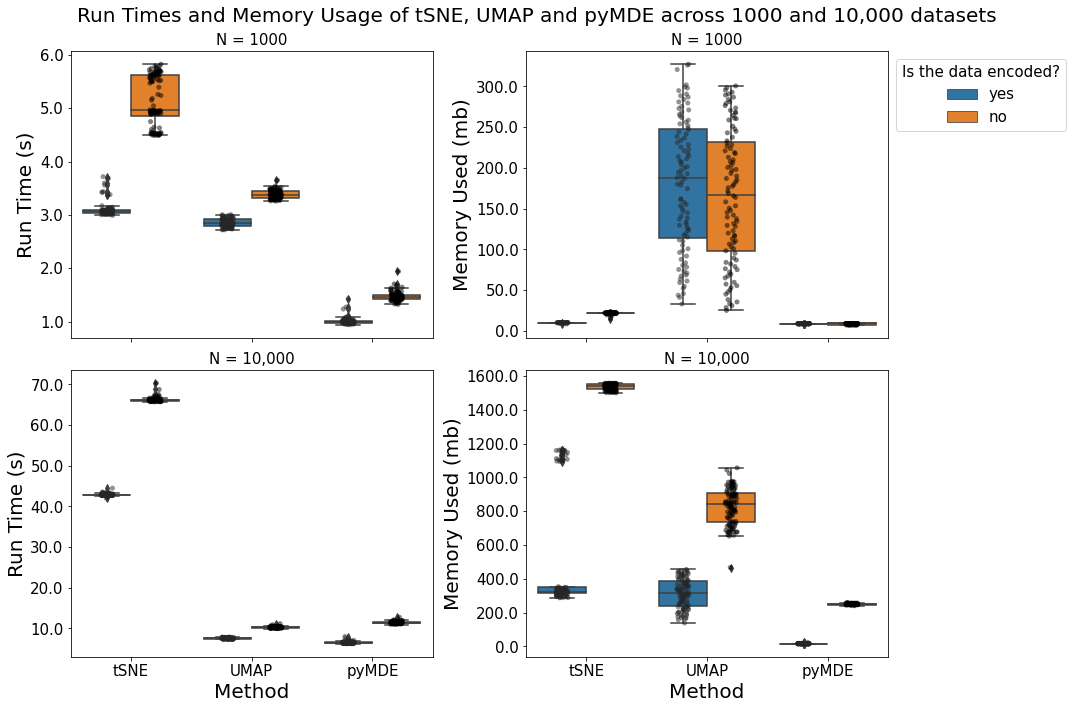

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10), sharex=True)


ax = axes.ravel()
c = sns.boxplot(data = run_times1000, x= 'type', y='run_times', ax = ax[0], hue = 'encoding', order=['tsne','umap','mde'])
sns.stripplot(data = run_times1000, x= 'type', y='run_times', ax = ax[0], hue = 'encoding', order=['tsne','umap','mde'], 
              dodge = True, palette = 'dark:black', alpha = 0.5, legend = False)
d = sns.boxplot(data = run_mems1000, x= 'type', y='interval', ax = ax[1], hue = 'encoding', order=['tsne','umap','mde'])
sns.stripplot(data = run_mems1000, x= 'type', y='interval', ax = ax[1], hue = 'encoding', order=['tsne','umap','mde'], 
              dodge = True, palette = 'dark:black', alpha = 0.5, legend = False)
e = sns.boxplot(data = run_times10000, x= 'type', y='run_times', ax = ax[2], hue = 'encoding', order=['tsne','umap','mde'])
sns.stripplot(data = run_times10000, x= 'type', y='run_times', ax = ax[2], hue = 'encoding', order=['tsne','umap','mde'], 
              dodge = True, palette = 'dark:black', alpha = 0.5, legend = False)
f = sns.boxplot(data = run_mems10000, x= 'type', y='interval', ax = ax[3], hue = 'encoding', order=['tsne','umap','mde'])
sns.stripplot(data = run_mems10000, x= 'type', y='interval', ax = ax[3], hue = 'encoding', order=['tsne','umap','mde'], 
              dodge = True, palette = 'dark:black', alpha = 0.5, legend = False)

for plots in [c,d]:
    plots.set_xlabel('')


c.set_ylabel('Run Time (s)',fontsize=20)
d.set_ylabel('Memory Used (mb)',fontsize=20)
    
e.set_xlabel('Method',fontsize=20)
e.set_ylabel('Run Time (s)',fontsize=20)
f.set_xlabel('Method',fontsize=20)
f.set_ylabel('Memory Used (mb)',fontsize=20)

for plots in [c,d,e,f]:
    plots.set_yticklabels(plots.get_yticks(), size = 15)
    
    if plots != d:
        plots.get_legend().remove()

d.legend(title = 'Is the data encoded?', title_fontsize = 15)
sns.move_legend(d, "upper left", bbox_to_anchor=(1, 1), fontsize = 15)
        
for plots in [e,f]:
    plots.set_xticklabels(['tSNE', 'UMAP', 'pyMDE'], size = 15)
    
for plots in [c,d]:
    plots.set_title('N = 1000', fontsize = 15)
for plots in [e,f]:
    plots.set_title('N = 10,000', fontsize = 15)
    
fig.suptitle('Run Times and Memory Usage of tSNE, UMAP and pyMDE across 1000 and 10,000 datasets', fontsize = 20)
plt.tight_layout()
plt.savefig('time_memory_results/Time and Memory Use.png', dpi=150,)
plt.show()

In [93]:
run_times1000
run_mems1000
run_times10000
run_mems10000

for df in [run_mems1000, run_mems10000]:
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop(df[df.interval <= 0].index)
    df1 = df.groupby(['encoding', 'type'])
    display(df1.agg([np.mean, np.std]))
    
for df in [run_times1000, run_times10000]:
    df = df.drop('Unnamed: 0', axis=1)
    df1 = df.groupby(['encoding', 'type'])
    display(df1.agg([np.mean, np.std]))

run_mems               baselines         interval           
                      mean        std         mean  std        mean        std
encoding type                                                                 
no       mde   3210.906445   0.734078  3202.281250  0.0    8.625195   0.734078
         tsne  3636.386558   0.955408  3614.609375  0.0   21.777183   0.955408
         umap  3073.262539  81.218503  2908.050781  0.0  165.211758  81.218503
yes      mde   3202.269297   0.104307  3193.382812  0.0    8.886484   0.104307
         tsne  3682.123506   0.317540  3672.132812  0.0    9.990694   0.317540
         umap  2768.109297  80.411196  2588.425781  0.0  179.683516  80.411196

run_mems                baselines          interval  \
                      mean         std         mean  std         mean   
encoding type                                                           
no       mde   4178.898672    3.543092  3928.191406  0.0   250.707266   
         tsne  4064.391445   16.905847  2528.308594  0.0  1536.082852   
         umap  3813.393281  108.178502  2983.101562  0.0   830.291719   
yes      mde   3940.714063    1.028128  3923.964844  0.0    16.749219   
         tsne  3844.424961  348.173290  3330.042969  0.0   514.381992   
         umap  2852.706992   86.168194  2538.832031  0.0   313.874961   

                           
                      std  
encoding type              
no       mde     3.543092  
         tsne   16.905847  
         umap  108.178502  
yes      mde     1.028128  
         tsne  348.173290  
         umap   86.168194

run_times          
                   mean       std
encoding type                    
no       mde   1.471160  0.086607
         tsne  5.154547  0.464114
         umap  3.386004  0.076085
yes      mde   1.007425  0.063898
         tsne  3.102913  0.138790
         umap  2.855035  0.075330

run_times          
                    mean       std
encoding type                     
no       mde   11.481822  0.269938
         tsne  66.187866  0.587774
         umap  10.303943  0.193289
yes      mde    6.546067  0.260446
         tsne  42.864165  0.263931
         umap   7.574889  0.146404

In [1]:
from src.preprocessing_modules import *
import numpy as np
import matplotlib.pyplot as plt
import umap
import pymde
import torch

# Set the random seed
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)   
tf.config.experimental.enable_op_determinism()

data_directory = 'Sample Datasets/GSE100866'
meta_data, pro, rna, cite_seq_data, labels_encoder, labels, data_with_targets = compile_data(data_directory, cell_type_col)
train_data, test_data, train_labels, test_labels = generate_training(data_with_targets, pro, gene_only = True)
history, autoencoder, encoder = gene_only_encoder(train_data, test_data, 64, 'GSE100866', 'gene_only')
# Perform the TSNE on the bottleneck layer of the encoded data and the non encoded data
N_predict = 15000
# Make the encoder do its job. We can now store this as an output to a var
training_predicted = encoder.predict(test_data[:N_predict])


Reading Data in Sample Datasets/GSE100866/

Metadata found!
Protein Data Found!
RNA-seq data found!

Reading in the data!
Loaded metadata
Loaded protein data
Loaded rna data
MODEL ALREADY EXISTS, TO RETRAIN, SET PARAM "override = True"


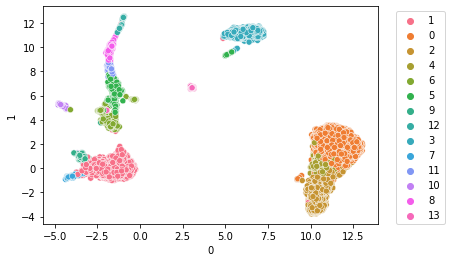

In [5]:
import sklearn.neighbors
import seaborn as sns
from sknetwork.clustering import Louvain

knn_graph = sklearn.neighbors.kneighbors_graph(training_predicted, 20)


louvain = Louvain()
labels = louvain.fit_transform(knn_graph)

df = pd.DataFrame(train_encoded_umap)
df['label'] = labels
df = df.astype({'label': str})
sns.scatterplot(x = 0, y = 1, data = df, hue = 'label')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

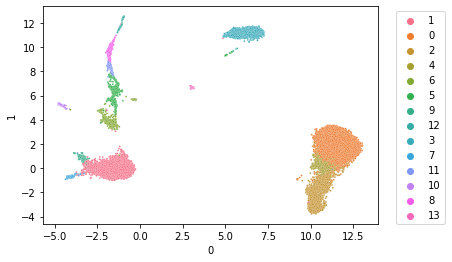

In [15]:
df = df.astype({'label': str})
sns.scatterplot(x = 0, y = 1, data = df, hue = 'label', s = 3)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()